# House predictions with linear regression

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import utils

In [14]:
data = pd.read_csv('Hyderabad.csv')
data

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


### Exploring the relationship between price and area

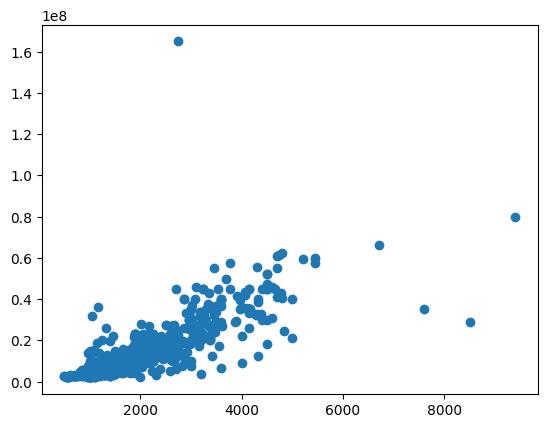

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                2518 non-null   int64 
 1   Area                 2518 non-null   int64 
 2   Location             2518 non-null   object
 3   No. of Bedrooms      2518 non-null   int64 
 4   Resale               2518 non-null   int64 
 5   MaintenanceStaff     2518 non-null   int64 
 6   Gymnasium            2518 non-null   int64 
 7   SwimmingPool         2518 non-null   int64 
 8   LandscapedGardens    2518 non-null   int64 
 9   JoggingTrack         2518 non-null   int64 
 10  RainWaterHarvesting  2518 non-null   int64 
 11  IndoorGames          2518 non-null   int64 
 12  ShoppingMall         2518 non-null   int64 
 13  Intercom             2518 non-null   int64 
 14  SportsFacility       2518 non-null   int64 
 15  ATM                  2518 non-null   int64 
 16  ClubHo

In [15]:
plt.scatter(data['Area'], data['Price'])
plt.show() # Видим что есть выбросы, нет пропусков в данных
data.info()


In [38]:
import sklearn as sk

In [40]:
features = data.columns.tolist()[1:]
features.remove("Location")
train_x, test_x, train_y, test_y = sk.model_selection.train_test_split(data[features], data['Price'], test_size=0.2, random_state=42)
simple_model = sk.linear_model.LinearRegression()
simple_model.fit(train_x, train_y)


LinearRegression()

In [41]:
print(f"Коэффициенты: {simple_model.coef_}, смещение: {simple_model.intercept_}")

Коэффициенты: [   10928.61866032 -1705146.78007027  1210314.98209361 -1289087.07544112
  -900407.29855375   455562.03728059  1039148.97478573  -360416.30700965
  -550065.60152606   492052.39018893  -380268.54622133  -136699.48585731
  -857095.32603018   787511.30184934  1024759.04891896  -776890.62559417
  -960360.28275458   565616.70945117   281377.68494857  -315106.25419204
   770513.84045414   786970.79805856   712317.88257111  1309646.80780692
   538176.30512298   922776.15630124   586379.51856068   138275.17901714
  -501175.64323128  1272396.41714602    25439.85074155 -2242588.12219694
 -1768599.018457     705123.19612697   317650.96050403 -1212059.68893622
  -477096.58604777  -141075.73937637], смещение: -4029553.1681513116


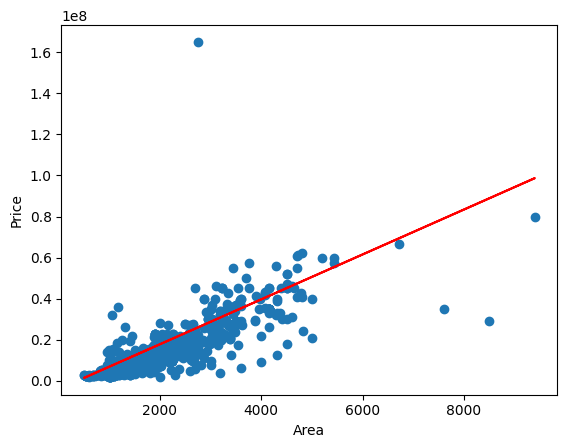

In [43]:
plt.scatter(data['Area'], data['Price'])
coef = simple_model.coef_[data.columns.tolist().index("Area") - 1]
intercept = simple_model.intercept_
plt.plot(data['Area'], data["Area"] * coef + intercept, color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

## Find MSE, RMSE and max squared error for model

In [44]:
prediction = simple_model.predict(test_x)
MSE = sk.metrics.mean_absolute_error(test_y, prediction)
RMSE = sk.metrics.root_mean_squared_error(test_y, prediction)
max_error = sk.metrics.max_error(test_y, prediction)
print(f" MSE: {MSE}, RMSE: {RMSE}, max error :{max_error}")

 MSE: 2328897.082827505, RMSE: 4279555.466321104, max error :49632824.764128804


Видим, что ошибка большая скорее всего такое произошло из-за выбросов в данных, попытаеся их очистить

## Cleaning data for better prediction

Чтобы избавиться от выбросов, найдем процентиль 90 (по параметру price, остальные параметры в основном маленькие, поэтому часто повторяются)

In [55]:
quaintile = data["Price"].quantile(0.90)
filtered_data = data[data["Price"] < quaintile]
filtered_data.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,2.266000e+03,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,...,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000
mean,7.518129e+06,1464.001765,2.508385,0.197264,0.409091,0.718447,0.685349,0.598853,0.536187,0.586055,...,0.968226,0.359665,0.589144,0.343778,0.338041,0.319947,0.333628,0.341130,0.341571,0.323477
std,3.348611e+06,412.671371,0.570171,0.398021,1.639977,1.627898,1.632000,1.639517,1.642097,1.640239,...,1.574313,1.636487,1.640074,1.635046,1.634488,1.632593,1.634044,1.634791,1.634834,1.632978
min,2.000000e+06,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.600000e+06,1150.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.009500e+06,1400.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.776500e+06,1694.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.730000e+07,4320.000000,5.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


Отобразим данные по Area - price на графике

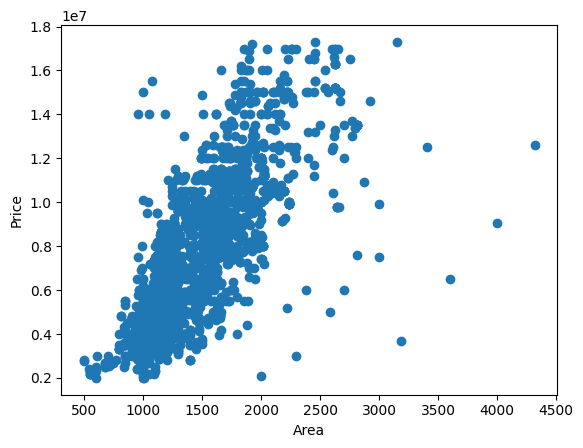

In [ ]:
plt.scatter(filtered_data['Area'], filtered_data['Price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

Видим что ещё остались выбросы по Area

In [58]:
quaintile = filtered_data["Area"].quantile(0.90)
filtered_data = filtered_data[filtered_data["Area"] < quaintile]

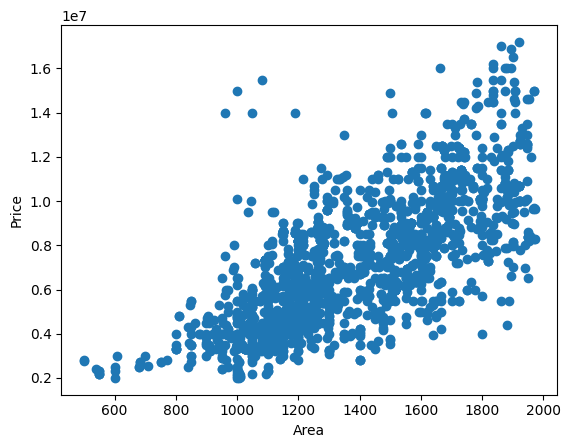

In [59]:
plt.scatter(filtered_data['Area'], filtered_data['Price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

Видим что данные уже стали лучше, попробуем обучить модель на новых данных

In [60]:
train_x, test_x, train_y, test_y = sk.model_selection.train_test_split(filtered_data[features], filtered_data['Price'], test_size=0.2, random_state=42)
simple_model_new = sk.linear_model.LinearRegression()
simple_model_new.fit(train_x, train_y)


LinearRegression()

In [ ]:
MSE_old = sk.metrics.mean_absolute_error(test_y, simple_model.predict(test_x))
MSE_new = sk.metrics.mean_absolute_error(test_y, simple_model_new.predict(test_x))
print(f"MSE old: {MSE_old}, MSE new: {MSE_new}, diff {(MSE_old - MSE_new) / MSE_old * 100}%")

MSE old: 1465865.7577853876, MSE new: 1264943.626405288, diff 13.706721117740708%


Видим что модель стала лучше, попробуем проверить на старых данных

In [63]:
MSE_old = sk.metrics.mean_absolute_error(data['Price'], simple_model.predict(data[features]))
MSE_new = sk.metrics.mean_absolute_error(data['Price'], simple_model_new.predict(data[features]))
print(f"MSE old: {MSE_old}, MSE new: {MSE_new}, diff {(MSE_old - MSE_new) / MSE_old * 100}%")

MSE old: 2250542.145040367, MSE new: 2291199.2983936733, diff -1.8065492993723615%


Видим, что стало хуже!